# Document Summarization

## Crawling Portal Berita Antaranews

In [29]:
import requests
from bs4 import BeautifulSoup
import csv
import random

- request: Library ini memungkinkan Anda untuk mengirim HTTP requests (seperti GET, POST, PUT, DELETE) dan menerima respons dari server. Dengan menggunakan Requests, Anda dapat mengakses dan mengambil data dari URL, mengirim data form, dan berinteraksi dengan API.

- beautifulSoup: Beautiful Soup adalah library Python yang digunakan untuk mengambil data dari HTML dan XML. Ini menyediakan cara yang mudah untuk menjelajahi, mencari, dan memanipulasi struktur data dokumen web. Beautiful Soup bekerja dengan parser HTML, membantu Anda mengekstrak informasi dari halaman web dengan lebih mudah.

- csv: Modul CSV di Python menyediakan fungsi untuk membaca dan menulis file CSV. Ini memungkinkan Anda untuk dengan mudah bekerja dengan data dalam format CSV, yang umumnya digunakan untuk menyimpan data tabel, terutama dalam konteks analisis data dan pertukaran data antar program.

- random: Library ini menyediakan fungsi-fungsi untuk menghasilkan angka acak. Dalam konteks web scraping atau pengujian, Anda mungkin menggunakan library ini untuk memilih elemen acak dari daftar atau untuk menyimulasikan perilaku yang tidak terduga.



In [30]:
# masukkan url
response = requests.get("https://www.antaranews.com/")
# Isi teks dari respons HTTP yang diterima dari server web setelah melakukan permintaan GET.
soup = BeautifulSoup(response.text, 'html.parser')
# menemukan semua list yang berisi link kategori
first_page = soup.findAll('li',"dropdown mega-full menu-color1")

# menyimpan kategori
save_categori = []
for links in first_page:
  categori = links.find('a').get('href')
  save_categori.append(categori)
# save_categori

# categori yang akan disearch terdapat pada indeks 1 (politik)
categori_search = [save_categori[1]]
categori_search

['https://www.antaranews.com/politik']

In [31]:
# Inisialisasi list untuk menyimpan data berita
datas = []

# Iterasi melalui halaman berita
for ipages in range(1, 3):

    # Iterasi melalui setiap kategori berita
    for beritas in categori_search:
        # Permintaan untuk halaman berita
        response_berita = requests.get(beritas + "/" + str(ipages))
        namecategori = beritas.split("/")

        # Parsing halaman berita dengan BeautifulSoup
        soup_berita = BeautifulSoup(response_berita.text, 'html.parser')
        pages_berita = soup_berita.findAll('article', {'class': 'simple-post simple-big clearfix'})

        # Iterasi melalui setiap artikel dalam halaman berita
        for items in pages_berita:
            # Mendapatkan link artikel
            get_link_in = items.find("a").get("href")

            # Request untuk halaman artikel
            response_artikel = requests.get(get_link_in)
            soup_artikel = BeautifulSoup(response_artikel.text, 'html.parser')

            # Ekstraksi informasi dari halaman artikel
            judul = soup_artikel.find("h1", "post-title").text if soup_artikel.findAll("h1", "post-title") else ""
            label = namecategori[-1]
            date = soup_artikel.find("span", "article-date").text if soup_artikel.find("span", "article-date") else "Data tanggal tidak ditemukan"

            trash1 = ""
            cek_baca_juga = soup_artikel.findAll("span", "baca-juga")
            if cek_baca_juga:
                for bacas in cek_baca_juga:
                    text_trash = bacas.text
                    trash1 += text_trash + ' '

            artikels = soup_artikel.find_all('div', {'class': 'post-content clearfix'})
            artikel_content = artikels[0].text if artikels else ""
            artikel = artikel_content.replace("\n", " ").replace("\t", " ").replace("\r", " ").replace(trash1, "").replace("\xa0", "")

            author = soup_artikel.find("p", "text-muted small mt10").text.replace("\t\t", "") if soup_artikel.findAll("p", "text-muted small mt10") else ""

            # Menambahkan data artikel ke dalam list
            datas.append({'Tanggal': date, 'Penulis': author, 'Judul': judul, 'Artikel': artikel, 'Label': label})


In [32]:
# Iterasi melalui halaman berita
for ipages in range(1, 3):
    # Mengecek apakah iterasi saat ini kurang dari 2
    if ipages < 2:
        # Menampilkan jumlah data yang telah berhasil di-crawling
        print(f'Data berhasil dicrawling sebanyak : {len(datas)}')

Data berhasil dicrawling sebanyak : 30


In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'berita_politik_antaranews.csv'
# Membuka file CSV untuk ditulis ('w' mode) dengan encoding utf-8
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    # Menentukan kolom (fieldnames) untuk file CSV
    fieldnames = ['Tanggal', 'Penulis', 'Judul', 'Artikel', 'Label']
    # Membuat objek DictWriter untuk menulis data ke file CSV
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    # Menulis header (baris pertama) ke file CSV
    csv_writer.writeheader()
    # Iterasi melalui data yang akan disimpan (diasumsikan datas sudah didefinisikan sebelumnya)
    for entry in datas:
        # Menulis setiap baris data ke file CSV
        csv_writer.writerow(entry)
# Menampilkan pesan bahwa data telah disimpan dalam file CSV
print(f"Data telah disimpan dalam file {csv_filename}")

## Import library/package yang dibutuhkan (Memproses Data)

In [ ]:
import pandas as pd
import re

- Pandas adalah library open-source yang ditulis dalam bahasa pemrograman Python untuk analisis data dan manipulasi data. Dikembangkan oleh Wes McKinney, Pandas menyediakan struktur data yang efisien dan mudah digunakan untuk memanipulasi dan menganalisis data numerik dan tabular. Pandas sangat populer di kalangan data scientist, analis data, dan pengembang perangkat lunak karena kemudahan penggunaannya dan dukungan yang luas dalam ekosistem Python

- re adalah library Python yang menyediakan dukungan untuk ekspresi reguler (regular expressions). Ekspresi reguler adalah urutan karakter yang membentuk pola pencarian. Modul re memungkinkan pencocokkan pola dengan string dan melakukan berbagai operasi seperti pencarian, pencocokan, dan manipulasi string berdasarkan pola tertentu.

## Load data

Memanggil dataset yang akan digunakan dan ditampilkan dalam bentuk dataframe

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dennywr/cobaprosaindata/main/berita_politik_antaranews.csv')

In [ ]:
df = pd.DataFrame(data)
df.head(5)

,Tanggal,Penulis,Judul,Artikel,Label
0,"Kamis, 30 November 2023 21:54 WIB",Pewarta: Walda MarisonEditor: D.Dj. Kliwantoro...,Kampanye pertama Prabowo akan ke Jawa Barat da...,Jakarta (ANTARA) - Calon Presiden RI Prab...,politik
1,"Kamis, 30 November 2023 21:25 WIB",Pewarta: Tim JACXEditor: Indriani COPYRIGHT ©...,Hoaks! Prabowo dinonaktifkan sebagai Menteri P...,Jakarta (ANTARA/JACX) – Sebuah unggahan vid...,politik
2,"Kamis, 30 November 2023 21:18 WIB",Pewarta: Fianda Sjofjan RassatEditor: Chandra ...,HNW ingatkan utang PBB untuk kemerdekaan Pales...,Jakarta (ANTARA) - Wakil Ketua Majelis Pe...,politik
3,"Kamis, 30 November 2023 21:16 WIB",Pewarta: Khaerul IzanEditor: D.Dj. Kliwantoro ...,Timnas AMIN: Pose salam merdeka di surat suara...,"Anies ini sangat mengerti tentang sejarah, da...",politik
4,"Kamis, 30 November 2023 20:40 WIB",Pewarta: Melalusa Susthira KhalidaEditor: Chan...,Puan ingatkan KPU tingkatkan keamanan data ant...,KPU dan Kemenkominfo harus segera mengidentif...,politik


In [ ]:
df['Artikel'] = df['Artikel'].fillna('').astype(str)

## Preprocessing

Preprocessing merupakan serangkaian langkah atau tahapan yang dilakukan untuk membersihkan, merapihkan, dan mengubah data teks mentah menjadi bentuk yang lebih sesuai untuk analisis atau pemodelan. Proses ini penting karena data teks seringkali datang dalam bentuk yang tidak terstruktur dan memerlukan persiapan khusus sebelum dapat digunakan secara efektif

- Hapus karakter spesial pada teks

> Karakter spesial adalah karakter yang memiliki makna khusus seperti : / $ |




In [ ]:
def removeSpecialText (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"").replace('None',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['Artikel'] = df['Artikel'].apply(removeSpecialText)
print(df['Artikel'])

0          Jakarta (ANTARA) - Calon Presiden RI Prab...
1        Jakarta (ANTARA/JACX) ? Sebuah unggahan vid...
2          Jakarta (ANTARA) - Wakil Ketua Majelis Pe...
3      Anies ini sangat mengerti tentang sejarah, da...
4      KPU dan Kemenkominfo harus segera mengidentif...
5          Medan (ANTARA) - Provinsi Sumatera Utara ...
6          Jakarta (ANTARA) - Direktur Nasional GusD...
7          Jakarta (ANTARA) - Dewan Pengarah Tim Kam...
8          Jakarta (ANTARA) - Sekretaris Jenderal (S...
9      itu lebih baik daripada mencari kesalahan kom...
10     (saya) harus siap berdebat dan memperlihatkan...
11     Sebisa mungkin yang sudah terbiasa menghadapi...
12     kita lihat saja nanti, begitu lohJakarta (ANT...
13         Jakarta (ANTARA) - Calon Wakil Presiden R...
14         Kupang (ANTARA) - Presiden RI Joko Widodo...
15         Jakarta (ANTARA) - Kementerian Pendayagun...
16         Jakarta (ANTARA) - Menteri Pendayagunaan ...
17     itu masuk kategori pindah memilih dan kam

- Hapus tanda baca pada teks

> Tanda baca adalah simbol atau karakter yang digunakan dalam penulisan untuk memberikan arti atau menandai struktur kalimat, misalnya . , ? !

In [ ]:
def removePunctuation(text):
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
  return text

df['Artikel'] = df['Artikel'].apply(removePunctuation)
df['Artikel'].head(20)

0          Jakarta  ANTARA    Calon Presiden RI Prab...
1        Jakarta  ANTARA JACX    Sebuah unggahan vid...
2          Jakarta  ANTARA    Wakil Ketua Majelis Pe...
3      Anies ini sangat mengerti tentang sejarah  da...
4      KPU dan Kemenkominfo harus segera mengidentif...
5          Medan  ANTARA    Provinsi Sumatera Utara ...
6          Jakarta  ANTARA    Direktur Nasional GusD...
7          Jakarta  ANTARA    Dewan Pengarah Tim Kam...
8          Jakarta  ANTARA    Sekretaris Jenderal  S...
9      itu lebih baik daripada mencari kesalahan kom...
10      saya  harus siap berdebat dan memperlihatkan...
11     Sebisa mungkin yang sudah terbiasa menghadapi...
12     kita lihat saja nanti  begitu lohJakarta  ANT...
13         Jakarta  ANTARA    Calon Wakil Presiden R...
14         Kupang  ANTARA    Presiden RI Joko Widodo...
15         Jakarta  ANTARA    Kementerian Pendayagun...
16         Jakarta  ANTARA    Menteri Pendayagunaan ...
17     itu masuk kategori pindah memilih dan kam

- Hapus angka pada teks

> Angka adalah simbol matematika yang digunakan untuk menyatakan nilai kuantitatif atau jumlah, misalnya 1, 2, 3, 4, 5, 6

In [ ]:
def removeNumbers (text):
  return re.sub(r"\d+", "", text)
df['Artikel'] = df['Artikel'].apply(removeNumbers)
df['Artikel']

0          Jakarta  ANTARA    Calon Presiden RI Prab...
1        Jakarta  ANTARA JACX    Sebuah unggahan vid...
2          Jakarta  ANTARA    Wakil Ketua Majelis Pe...
3      Anies ini sangat mengerti tentang sejarah  da...
4      KPU dan Kemenkominfo harus segera mengidentif...
5          Medan  ANTARA    Provinsi Sumatera Utara ...
6          Jakarta  ANTARA    Direktur Nasional GusD...
7          Jakarta  ANTARA    Dewan Pengarah Tim Kam...
8          Jakarta  ANTARA    Sekretaris Jenderal  S...
9      itu lebih baik daripada mencari kesalahan kom...
10      saya  harus siap berdebat dan memperlihatkan...
11     Sebisa mungkin yang sudah terbiasa menghadapi...
12     kita lihat saja nanti  begitu lohJakarta  ANT...
13         Jakarta  ANTARA    Calon Wakil Presiden R...
14         Kupang  ANTARA    Presiden RI Joko Widodo...
15         Jakarta  ANTARA    Kementerian Pendayagun...
16         Jakarta  ANTARA    Menteri Pendayagunaan ...
17     itu masuk kategori pindah memilih dan kam

- Ubah semua huruf pada teks menjadi huruf kecil

> Untuk menghindari ambiguitas dan mempermudah pemrosesan teks, terutama dalam konteks perbandingan string dan pencarian teks. Dalam banyak kasus, case folding digunakan untuk mengurangi kompleksitas dan membuat perbandingan teks menjadi lebih konsisten (keseragaman)

In [ ]:
def casefolding(Comment):
  Comment = Comment.lower()
  return Comment
df['Artikel'] = df['Artikel'].apply(casefolding)
df['Artikel']

0          jakarta  antara    calon presiden ri prab...
1        jakarta  antara jacx    sebuah unggahan vid...
2          jakarta  antara    wakil ketua majelis pe...
3      anies ini sangat mengerti tentang sejarah  da...
4      kpu dan kemenkominfo harus segera mengidentif...
5          medan  antara    provinsi sumatera utara ...
6          jakarta  antara    direktur nasional gusd...
7          jakarta  antara    dewan pengarah tim kam...
8          jakarta  antara    sekretaris jenderal  s...
9      itu lebih baik daripada mencari kesalahan kom...
10      saya  harus siap berdebat dan memperlihatkan...
11     sebisa mungkin yang sudah terbiasa menghadapi...
12     kita lihat saja nanti  begitu lohjakarta  ant...
13         jakarta  antara    calon wakil presiden r...
14         kupang  antara    presiden ri joko widodo...
15         jakarta  antara    kementerian pendayagun...
16         jakarta  antara    menteri pendayagunaan ...
17     itu masuk kategori pindah memilih dan kam

## TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang digunakan mengevaluasi seberapa penting sebuah kata bagi sebuah dokumen dalam kumpulan dokumen dengan cara mengalikan berapa kali sebuah kata muncul dalam sebuah dokumen (Term Frequency) dengan frekuensi dokumen terbalik (Inverse Document Frequency) dari kata di seluruh set dokumen.




### Term Frequency (TF)

$\text{TF}(t, d) = \frac{\text{jumlah kemunculan term } t \text{ dalam dokumen } d}{\text{total jumlah term dalam dokumen } d}
$

### Inverse Document Frequency (IDF)

$\text{IDF}(t, D) = \log\left(\frac{\text{total jumlah dokumen dalam korpus } |D|}{\text{jumlah dokumen yang mengandung term } t + 1}\right)
$

### Term Frequency-Inverse Document Frequency (TF-IDF)

$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)$


Penjelasan:

- t adalah term (kata kunci),
- d adalah dokumen,
- D adalah korpus (kumpulan dokumen),
- ∣D∣ adalah total jumlah dokumen dalam korpus.

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords', quiet=True)

True

In [ ]:
finalResult = pd.DataFrame(df, columns=["Artikel"])
# finalResult

> Membuat matriks TF-IDF dari teks dalam kolom 'Join Words' dari dataframe finalResult. Pertama, dilakukan impor modul stopwords dari NLTK untuk mendapatkan daftar stopwords dalam bahasa Indonesia. Selanjutnya, dibuat tokenizer dengan RegexpTokenizer untuk memproses teks. Kemudian, menggunakan TfidfVectorizer dari scikit-learn, teks diubah menjadi representasi vektor TF-IDF. Proses ini mencakup pengonversian huruf menjadi huruf kecil, penggunaan stopwords, dan penerapan tokenizer. Matriks TF-IDF yang dihasilkan, disimpan dalam variabel tfidf_matrix

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)

stopwords = stopwords.words('indonesian')

tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(lowercase=True,
                        stop_words=stopwords,
                        tokenizer = tokenizer.tokenize)


tfidf_matrix = vectorizer.fit_transform(finalResult["Artikel"])
tfidf_terms = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


### Vector Space Model (VSM)

> (Vector Space Model atau VSM) adalah representasi matematis dari dokumen-dokumen dalam suatu korpus atau koleksi teks. Dalam VSM, setiap dokumen direpresentasikan sebagai vektor dalam ruang vektor yang memiliki dimensi sebanding dengan jumlah kata unik dalam seluruh korpus. Setiap dimensi vektor mewakili kata tertentu, dan nilai dalam dimensi tersebut dapat mencerminkan berbagai informasi, seperti frekuensi kemunculan kata atau skor TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Membuat objek CountVectorizer
coun_vect = CountVectorizer(stop_words=stopwords)
count_matrix = coun_vect.fit_transform(finalResult["Artikel"])
count_array = count_matrix.toarray()
# Membuat DataFrame dari array dengan kolom berdasarkan term dalam teks
df = pd.DataFrame(data=count_array,columns = coun_vect.vocabulary_.keys())
df

,jakarta,calon,presiden,ri,prabowo,subianto,menggelar,kampanye,jawa,barat,...,dalamundang,dibatalkan,denganperpu,pengganti,zoelva,ketimpangan,berkembang,janji,bawa,kerukunan
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# menampilkan bobot dari masing-masing term
vsc = pd.DataFrame(data=tfidf_matrix.toarray(),columns = vectorizer.vocabulary_.keys())
print("\nTF-IDF Vectorizer\n")
vsc


TF-IDF Vectorizer



,jakarta,calon,presiden,ri,prabowo,subianto,menggelar,kampanye,jawa,barat,...,dalamundang,dibatalkan,denganperpu,pengganti,zoelva,ketimpangan,berkembang,janji,bawa,kerukunan
0,0.000000,0.000000,0.000000,0.000000,0.059124,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.027991,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.046783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.032159,0.000000,0.122104,0.000000,0.000000,0.000000,...,0.000000,0.040701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066041,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068426
8,0.000000,0.111304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.076055,0.000000,0.000000,0.000000,0.000000


## Cosinus Similarity

Cosine similarity adalah ukuran statistik yang digunakan untuk menentukan seberapa mirip dua vektor. Cosine similarity sering digunakan untuk mengukur seberapa mirip dua atau lebih dokumen. Berikut merupakan rumus untuk menghitung cosine similarity:


$\text{cosine similarity}(A, B) = \frac{A \cdot B}{||A||_2 \times ||B||_2} = \frac{\sum_{i=1}^{n} A_i \times B_i}{\sqrt{\sum_{i=1}^{n} (A_i)^2} \times \sqrt{\sum_{i=1}^{n} (B_i)^2}}$



Dimana:


- A dan B adalah dua vektor yang ingin Anda hitung cosine similarity-nya

- A⋅B adalah dot product dari dua vektor

- ∣∣A∣∣2​ dan ∣∣B∣∣2​ adalah norm (atau panjang) dari masing-masing vektor

In [ ]:
import numpy as np

def cosine_similarity(matrix):
    # Normalisasi vektor
    norm = np.linalg.norm(matrix, axis=1, keepdims=True)
    matrix_norm = matrix / norm

    # Hitung cosine similarity
    calculate_cosine_similarity = np.dot(matrix_norm, matrix_norm.T)

    return calculate_cosine_similarity

# hitung cosine similarity
cosine_similarity_result = cosine_similarity(tfidf_matrix.toarray())
# menghasilkan matriks cosine similarity, di mana setiap elemen i, j mewakili cosine similarity antara dokumen i dan j
cosine_similarity_df = pd.DataFrame(cosine_similarity_result)

# Menampilkan DataFrame
cosine_similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.138313,0.019818,0.242372,0.043953,0.048047,0.011511,0.359718,0.058305,0.306806,0.146100,0.307166,0.158427,0.380565,0.130571,0.028587,0.019857,0.179862,0.323183
1,0.138313,1.000000,0.026166,0.049993,0.017484,0.007711,0.005904,0.099783,0.016621,0.057223,0.013754,0.088902,0.054917,0.072821,0.040786,0.040113,0.031795,0.025246,0.059768
2,0.019818,0.026166,1.000000,0.024393,0.042755,0.020254,0.067506,0.026662,0.018789,0.017158,0.008501,0.017459,0.026944,0.021645,0.010658,0.019593,0.050717,0.045347,0.039550
3,0.242372,0.049993,0.024393,1.000000,0.023905,0.005771,0.018319,0.208134,0.022601,0.302747,0.077284,0.172626,0.069014,0.164185,0.020066,0.019376,0.012916,0.086696,0.274210
4,0.043953,0.017484,0.042755,0.023905,1.000000,0.038022,0.022461,0.046429,0.016507,0.068078,0.051705,0.077447,0.067310,0.042726,0.010019,0.031344,0.040434,0.082461,0.044227
5,0.048047,0.007711,0.020254,0.005771,0.038022,1.000000,0.010910,0.018748,0.027486,0.014353,0.035490,0.049863,0.030143,0.023732,0.009580,0.020298,0.020460,0.037324,0.029173
6,0.011511,0.005904,0.067506,0.018319,0.022461,0.010910,1.000000,0.013905,0.025891,0.013470,0.015844,0.008649,0.028050,0.005358,0.006000,0.027435,0.063072,0.031698,0.016009
7,0.359718,0.099783,0.026662,0.208134,0.046429,0.018748,0.013905,1.000000,0.138962,0.190544,0.098781,0.272558,0.219568,0.247323,0.064303,0.023950,0.023105,0.219776,0.239682
8,0.058305,0.016621,0.018789,0.022601,0.016507,0.027486,0.025891,0.138962,1.000000,0.032906,0.044207,0.026629,0.026709,0.035980,0.013440,0.017222,0.015572,0.203233,0.025396
9,0.306806,0.057223,0.017158,0.302747,0.068078,0.014353,0.013470,0.190544,0.032906,1.000000,0.117381,0.235780,0.080435,0.203919,0.039003,0.017268,0.011635,0.094167,0.283027


## Graph (NetworkX)

Graph adalah jenis struktur data umum yang susunan datanya tidak berdekatan satu sama lain (non-linier). Graph terdiri dari kumpulan simpul berhingga untuk menyimpan data dan antara dua buah simpul terdapat hubungan saling keterkaitan. Simpul pada graph disebut dengan verteks (V), sedangkan sisi yang menghubungkan antar verteks disebut edge (E). Graf digunakan untuk merepresentasikan objek-objek diskrit dan hubungan antara objek-objek tersebut. Dalam bahasa sehari-hari, sebuah graf adalah himpunan dari objek-objek yang dinamakan titik, simpul, atau sudut dihubungkan oleh penghubung yang dinamakan garis atau sisi.

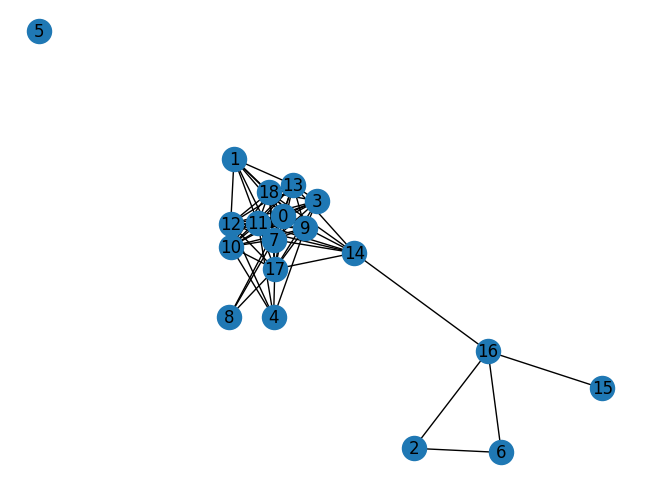

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik kosong
G = nx.Graph()

# Menambahkan node ke dalam grafik
for i in range(cosine_similarity_result.shape[0]):
    G.add_node(i)

# Menambahkan edge berdasarkan cosine similarity
for i in range(cosine_similarity_result.shape[0]):
    for j in range(i+1, cosine_similarity_result.shape[1]):
        # tambahkan threshold jika perlu
        if cosine_similarity_result[i, j] > 0.05:
            G.add_edge(i, j, weight=cosine_similarity_result[i, j])

# Menggambar grafik
nx.draw(G, with_labels=True)
plt.show()


## Closeness Centrality

Closeness Centrality adalah ukuran sentralitas dalam jaringan, dihitung sebagai balikan dari jumlah panjang jalur terpendek antara simpul dan semua simpul lainnya dalam grafik. Dengan kata lain, semakin sentral sebuah simpul, semakin dekat ia dengan semua simpul lainnya. Closeness Centrality digunakan untuk mendeteksi simpul yang mampu menyebarkan informasi dengan sangat efisien melalui grafik. Berikut merupakan rumus untuk menghitung closeness centrality:


$C(u) = \frac{1}{\sum_{v=1}^{n} d(u, v)}$


Dimana:

- $C(u)$ adalah closeness centrality dari node $u$


- $d(u,v)$  adalah jarak terpendek antara node $u$ dan $v$

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Mencetak hasil
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node 0: Closeness Centrality = 0.6422222222222222
Node 1: Closeness Centrality = 0.4722222222222222
Node 2: Closeness Centrality = 0.31481481481481477
Node 3: Closeness Centrality = 0.501736111111111
Node 4: Closeness Centrality = 0.44598765432098764
Node 5: Closeness Centrality = 0.0
Node 6: Closeness Centrality = 0.31481481481481477
Node 7: Closeness Centrality = 0.6422222222222222
Node 8: Closeness Centrality = 0.42251461988304095
Node 9: Closeness Centrality = 0.5351851851851852
Node 10: Closeness Centrality = 0.517921146953405
Node 11: Closeness Centrality = 0.6422222222222222
Node 12: Closeness Centrality = 0.6422222222222222
Node 13: Closeness Centrality = 0.6175213675213675
Node 14: Closeness Centrality = 0.6175213675213675
Node 15: Closeness Centrality = 0.3087606837606838
Node 16: Closeness Centrality = 0.44598765432098764
Node 17: Closeness Centrality = 0.6422222222222222
Node 18: Closeness Centrality = 0.6175213675213675


### Nilai closeness centrality dari yang tertinggi ke terendah

In [ ]:
# Mengurutkan node berdasarkan closeness centrality
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, closeness in sorted_closeness:
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node 0: Closeness Centrality = 0.6422222222222222
Node 7: Closeness Centrality = 0.6422222222222222
Node 11: Closeness Centrality = 0.6422222222222222
Node 12: Closeness Centrality = 0.6422222222222222
Node 17: Closeness Centrality = 0.6422222222222222
Node 13: Closeness Centrality = 0.6175213675213675
Node 14: Closeness Centrality = 0.6175213675213675
Node 18: Closeness Centrality = 0.6175213675213675
Node 9: Closeness Centrality = 0.5351851851851852
Node 10: Closeness Centrality = 0.517921146953405
Node 3: Closeness Centrality = 0.501736111111111
Node 1: Closeness Centrality = 0.4722222222222222
Node 4: Closeness Centrality = 0.44598765432098764
Node 16: Closeness Centrality = 0.44598765432098764
Node 8: Closeness Centrality = 0.42251461988304095
Node 2: Closeness Centrality = 0.31481481481481477
Node 6: Closeness Centrality = 0.31481481481481477
Node 15: Closeness Centrality = 0.3087606837606838
Node 5: Closeness Centrality = 0.0


### 3 nilai closeness centrality teratas

In [ ]:
# Mengambil 3 node dengan closeness centrality tertinggi
top_3_nodes = sorted_closeness[:3]

# Membuat DataFrame
df = pd.DataFrame(top_3_nodes, columns=['Node', 'Closeness Centrality'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Artikel'] for node, _ in top_3_nodes]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Closeness Centrality,Kalimat
Node,,
0,0.642222,jakarta antara calon presiden ri prab...
7,0.642222,jakarta antara dewan pengarah tim kam...
11,0.642222,sebisa mungkin yang sudah terbiasa menghadapi...


## Pagerank

PageRank bekerja dengan cara menghitung jumlah dan kualitas tautan yang masuk ke suatu simpul. Jika sebuah simpul memiliki banyak tautan yang masuk dari simpul lain yang penting, maka simpul tersebut akan dianggap penting. Berikut merupakan rumus untuk menghitung pagerank:


$PR(A) = (1-d) + d \left( \frac{PR(T1)}{C(T1)} + \frac{PR(T2)}{C(T2)} + ... + \frac{PR(Tn)}{C(Tn)} \right)$


Dimana:


- $PR(A)$ adalah PageRank dari halaman $A$.

- $PR(T1)$ sampai $PR(Tn)$ adalah PageRank dari halaman $T1$ sampai $Tn$ yang mengarah ke halaman $A$ (yaitu halaman yang memiliki tautan ke $A$).

- $C(T1)$ sampai $C(Tn)$ adalah jumlah tautan keluar dari halaman $T1$ sampai $Tn$.

- $d$ adalah faktor damping, yang biasanya diatur ke 0.85.

=> Berikut ini merupakan link dari contoh perhitungan manual Pagerank : [klik di sini](https://docs.google.com/spreadsheets/d/1gBKucZw2LPN16CquXfPdSySzrow9mNZlbBElaTeDcuU/edit?usp=sharing)

In [ ]:
# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

for node, rank in pagerank.items():
    print(f"Node {node}: PageRank = {rank}")

Node 0: PageRank = 0.09623954919722048
Node 1: PageRank = 0.02549297809860208
Node 2: PageRank = 0.03618320730401934
Node 3: PageRank = 0.05672587222167151
Node 4: PageRank = 0.018986916398153773
Node 5: PageRank = 0.008264462809917356
Node 6: PageRank = 0.03915082537958653
Node 7: PageRank = 0.08438687492227406
Node 8: PageRank = 0.02112533264527886
Node 9: PageRank = 0.06864001135488719
Node 10: PageRank = 0.06461618215352125
Node 11: PageRank = 0.09826492366454904
Node 12: PageRank = 0.07267305120321692
Node 13: PageRank = 0.06326791755877342
Node 14: PageRank = 0.036215108972434386
Node 15: PageRank = 0.024575494852734962
Node 16: PageRank = 0.06136270810254804
Node 17: PageRank = 0.056238700678557865
Node 18: PageRank = 0.06758988248205275


### Nilai pagerank dari tertinggi ke terendah

In [ ]:
# Mengurutkan PageRank dari yang tertinggi ke terendah
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, rank in sorted_pagerank:
    print(f"Node {node}: PageRank = {rank}")

Node 11: PageRank = 0.09826492366454904
Node 0: PageRank = 0.09623954919722048
Node 7: PageRank = 0.08438687492227406
Node 12: PageRank = 0.07267305120321692
Node 9: PageRank = 0.06864001135488719
Node 18: PageRank = 0.06758988248205275
Node 10: PageRank = 0.06461618215352125
Node 13: PageRank = 0.06326791755877342
Node 16: PageRank = 0.06136270810254804
Node 3: PageRank = 0.05672587222167151
Node 17: PageRank = 0.056238700678557865
Node 6: PageRank = 0.03915082537958653
Node 14: PageRank = 0.036215108972434386
Node 2: PageRank = 0.03618320730401934
Node 1: PageRank = 0.02549297809860208
Node 15: PageRank = 0.024575494852734962
Node 8: PageRank = 0.02112533264527886
Node 4: PageRank = 0.018986916398153773
Node 5: PageRank = 0.008264462809917356


### 3 nilai pagerank teratas

In [ ]:
# Mengambil 3 nilai teratas
top_3_pagerank = sorted_pagerank[:3]
df = pd.DataFrame(top_3_pagerank, columns=['Node', 'Pagerank'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Artikel'] for node, _ in top_3_pagerank]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Pagerank,Kalimat
Node,,
11,0.098265,sebisa mungkin yang sudah terbiasa menghadapi...
0,0.096240,jakarta antara calon presiden ri prab...
7,0.084387,jakarta antara dewan pengarah tim kam...


## Eignvector Centrality

Eigenvector Centrality adalah ukuran sentralitas dalam teori graf, yang memberikan skor relatif kepada semua simpul dalam jaringan berdasarkan konsep bahwa koneksi ke simpul dengan skor tinggi berkontribusi lebih banyak terhadap skor simpul yang dipertanyakan daripada koneksi yang sama ke simpul dengan skor rendah. Dengan kata lain, simpul dengan Eigenvector Centrality yang tinggi berarti bahwa simpul tersebut terhubung ke banyak simpul yang juga memiliki skor tinggi. Berikut merupakan rumus untuk menghitung nilai eignvector centrality:


$x_v = \frac{1}{\lambda} \sum_{t \in M(v)} x_t$

Dimana:

- $x_v$ adalah eigenvector centrality dari simpul $v$.

- $M(v)$ adalah set simpul yang berdekatan dengan $v$

- $x_t$​ adalah eigenvector centrality dari simpul $t$.

- λ adalah konstanta.

In [ ]:
# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Mencetak hasil
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

Node 0: Eigenvector Centrality = 0.30707243920924365
Node 1: Eigenvector Centrality = 0.2065331444671868
Node 2: Eigenvector Centrality = 0.002248328446411648
Node 3: Eigenvector Centrality = 0.26246652728770076
Node 4: Eigenvector Centrality = 0.14489881506755395
Node 5: Eigenvector Centrality = 7.979002979398061e-12
Node 6: Eigenvector Centrality = 0.002248328446411648
Node 7: Eigenvector Centrality = 0.30707243920924365
Node 8: Eigenvector Centrality = 0.08878891612328701
Node 9: Eigenvector Centrality = 0.29352812377287224
Node 10: Eigenvector Centrality = 0.27527350641790627
Node 11: Eigenvector Centrality = 0.31203171677985175
Node 12: Eigenvector Centrality = 0.31203171677985175
Node 13: Eigenvector Centrality = 0.2992247376496462
Node 14: Eigenvector Centrality = 0.20934819176545996
Node 15: Eigenvector Centrality = 0.0020299495978579364
Node 16: Eigenvector Centrality = 0.020931483776964643
Node 17: Eigenvector Centrality = 0.30162480098448335
Node 18: Eigenvector Centrality =

### Nilai eigenvector dari yang tertinggi ke terendah

In [ ]:
# Mengurutkan eigenvector centrality dari yang tertinggi ke terendah
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, centrality in sorted_eigenvector:
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

Node 11: Eigenvector Centrality = 0.31203171677985175
Node 12: Eigenvector Centrality = 0.31203171677985175
Node 0: Eigenvector Centrality = 0.30707243920924365
Node 7: Eigenvector Centrality = 0.30707243920924365
Node 17: Eigenvector Centrality = 0.30162480098448335
Node 18: Eigenvector Centrality = 0.29922473764964624
Node 13: Eigenvector Centrality = 0.2992247376496462
Node 9: Eigenvector Centrality = 0.29352812377287224
Node 10: Eigenvector Centrality = 0.27527350641790627
Node 3: Eigenvector Centrality = 0.26246652728770076
Node 14: Eigenvector Centrality = 0.20934819176545996
Node 1: Eigenvector Centrality = 0.2065331444671868
Node 4: Eigenvector Centrality = 0.14489881506755395
Node 8: Eigenvector Centrality = 0.08878891612328701
Node 16: Eigenvector Centrality = 0.020931483776964643
Node 2: Eigenvector Centrality = 0.002248328446411648
Node 6: Eigenvector Centrality = 0.002248328446411648
Node 15: Eigenvector Centrality = 0.0020299495978579364
Node 5: Eigenvector Centrality = 7

### 3 nilai Eigenvector teratas

In [ ]:
# Mengambil 3 nilai teratas
top_3_eigenvector = sorted_eigenvector[:3]
df = pd.DataFrame(top_3_eigenvector, columns=['Node', 'Eigenvector Centrality'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Artikel'] for node, _ in top_3_eigenvector]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Eigenvector Centrality,Kalimat
Node,,
11,0.312032,sebisa mungkin yang sudah terbiasa menghadapi...
12,0.312032,kita lihat saja nanti begitu lohjakarta ant...
0,0.307072,jakarta antara calon presiden ri prab...


## Betweeness Centrality

Betweenness Centrality adalah ukuran sentralitas dalam teori graf berdasarkan jalur terpendek. Betweenness Centrality mewakili sejauh mana simpul berdiri di antara satu sama lain. Betweenness Centrality sering digunakan untuk menemukan simpul yang berfungsi sebagai jembatan dari satu bagian grafik ke bagian lain. Berikut merupakan rumus untuk menghitung nilai betweenness centrality:

$C_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

Dimana:

- $C_B​(v)$ adalah betweenness centrality dari simpul $v$

- $V$ adalah set simpul dalam jaringan

- $σ(s,t)$ adalah jumlah shortest path dari simpul $s$ ke simpul $t$

- $σ(s,t∣v)$ adalah jumlah shortest path dari simpul $s$ ke simpul $t$ yang melewati simpul $v$

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Mencetak hasil
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node 0: Betweenness Centrality = 0.05166511048863991
Node 1: Betweenness Centrality = 0.0
Node 2: Betweenness Centrality = 0.0
Node 3: Betweenness Centrality = 0.0
Node 4: Betweenness Centrality = 0.0
Node 5: Betweenness Centrality = 0.0
Node 6: Betweenness Centrality = 0.0
Node 7: Betweenness Centrality = 0.05166511048863991
Node 8: Betweenness Centrality = 0.0
Node 9: Betweenness Centrality = 0.011515717398070339
Node 10: Betweenness Centrality = 0.0065359477124183
Node 11: Betweenness Centrality = 0.041861188920012456
Node 12: Betweenness Centrality = 0.041861188920012456
Node 13: Betweenness Centrality = 0.022253345782757547
Node 14: Betweenness Centrality = 0.33986928104575165
Node 15: Betweenness Centrality = 0.0
Node 16: Betweenness Centrality = 0.28758169934640526
Node 17: Betweenness Centrality = 0.06411453470277001
Node 18: Betweenness Centrality = 0.022253345782757547


### Nilai betweenness centrality dari yang tertinggi ke terendah

In [ ]:
# Mengurutkan betweenness centrality dari yang tertinggi ke terendah
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, centrality in sorted_betweenness:
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node 14: Betweenness Centrality = 0.33986928104575165
Node 16: Betweenness Centrality = 0.28758169934640526
Node 17: Betweenness Centrality = 0.06411453470277001
Node 0: Betweenness Centrality = 0.05166511048863991
Node 7: Betweenness Centrality = 0.05166511048863991
Node 11: Betweenness Centrality = 0.041861188920012456
Node 12: Betweenness Centrality = 0.041861188920012456
Node 13: Betweenness Centrality = 0.022253345782757547
Node 18: Betweenness Centrality = 0.022253345782757547
Node 9: Betweenness Centrality = 0.011515717398070339
Node 10: Betweenness Centrality = 0.0065359477124183
Node 1: Betweenness Centrality = 0.0
Node 2: Betweenness Centrality = 0.0
Node 3: Betweenness Centrality = 0.0
Node 4: Betweenness Centrality = 0.0
Node 5: Betweenness Centrality = 0.0
Node 6: Betweenness Centrality = 0.0
Node 8: Betweenness Centrality = 0.0
Node 15: Betweenness Centrality = 0.0


### 3 nilai Betweenness teratas

In [ ]:
# Mengambil 3 nilai teratas
top_3_betweenness = sorted_betweenness[:3]
df = pd.DataFrame(top_3_betweenness, columns=['Node', 'Betweenness Centrality'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Artikel'] for node, _ in top_3_betweenness]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Betweenness Centrality,Kalimat
Node,,
14,0.339869,kupang antara presiden ri joko widodo...
16,0.287582,jakarta antara menteri pendayagunaan ...
17,0.064115,itu masuk kategori pindah memilih dan kamisia...


  .

.

### Contoh perhitungan manual Pagerank

=> Berikut ini merupakan link dari perhitungan manual Pagerank secara lengkap (25 iterasi) : [klik di sini](https://docs.google.com/spreadsheets/d/1gBKucZw2LPN16CquXfPdSySzrow9mNZlbBElaTeDcuU/edit?usp=sharing)

1.. Insialisasi nilai awal pagerank untuk setiap node dalam graph menjadi 0.5

--> pagerank = {1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5}

Rumus:

    PR[A] = (1-d) + d * ((PR[T1] / C[T1]) + ... + (PR(Tn) / C(Tn)))

Note:

- PR[A] => pagerank halaman (node) A
- PR[T1] => pagerank halaman T1 yang mengacu ke halaman A
- C[T1] => jumlah link keluar (outbound link) pada halaman T1
- d => faktor damping yang bisa diberi antara 0 - 1
- n => jumlah keseluruhan halaman


2.. Lakukan iterasi untuk menghitung pagerank

--> Iterasi = 1:
  
  - PR[1] = (1-d) + d * (PR[3] / C[3])
  
    = (1 - 0.85) + 0.85 * (0.5 / 2)
    
    =  0.3625

  - PR[2] = (1-d) + d * (PR[1] / C[1])

    = (1 - 0.85) + 0.85 * (0.3625 / 1)
    
    = 0.458125

  - PR[3] = (1-d) + d * (PR[1] / C[1])

    = (1 - 0.85) + 0.85 * (0.3625 / 1)
    
    = 0.458125

  - PR[4] = (1-d) + d * (PR[2] / C[2] + PR[8] / C[8])

    = (1 - 0.85) + 0.85 * (0.458125 / 2 + 0.5 / 1)
    
    = 0.769703125

  - PR[5] = (1-d) + d * (PR[2] / C[2])

    = (1 - 0.85) + 0.85 * (0.458125 / 2)
    
    = 0.344703125

  - PR[6] = (1-d) + d * (PR[3] / C[3])

    = (1 - 0.85) + 0.85 * (0.458125 / 2)
    
    = 0.344703125

  - PR[7] = (1-d) + d * (PR[3] / C[3] + PR[9] / C[9])

    = (1 - 0.85) + 0.85 * (0.458125 / 2 + 0.5 / 1)
    
    = 0.769703125

  - PR[8] = (1-d) + d * (PR[4] / C[4] + PR[5] / C[5])
  
    = (1 - 0.85) + 0.85 * (0.769703125 / 1 + 0.344703125 / 1)
    
    =  1.0972453125

  - PR[9] = (1-d) + d * (PR[6] / C[6] + PR[7] / C[7])
  
    = (1 - 0.85) + 0.85 * (0.344703125 / 1 + 0.769703125 / 1)
    
    =  1.0972453125





--> Iterasi = 2:
  
  - PR[1] = (1-d) + d * (PR[3] / C[3])
  
    = (1 - 0.85) + 0.85 * (0.458125 / 2)
    
    =  0.344703125

  - PR[2] = (1-d) + d * (PR[1] / C[1])

    = (1 - 0.85) + 0.85 * (0.344703125 / 1)
    
    = 0.4429976563

  - PR[3] = (1-d) + d * (PR[1] / C[1])

    = (1 - 0.85) + 0.85 * (0.344703125 / 1)
    
    = 0.4429976563

  - PR[4] = (1-d) + d * (PR[2] / C[2] + PR[8] / C[8])

    = (1 - 0.85) + 0.85 * (0.179299766 / 2 + 1.0972453125 / 1)
    
    = 1.27093252

  - PR[5] = (1-d) + d * (PR[2] / C[2])

    = (1 - 0.85) + 0.85 * (0.179299766 / 2)
    
    = 0.3382740039

  - PR[6] = (1-d) + d * (PR[3] / C[3])

    = (1 - 0.85) + 0.85 * (0.179299766 / 2)
    
    = 0.3382740039

  - PR[7] = (1-d) + d * (PR[3] / C[3] + PR[9] / C[9])

    = (1 - 0.85) + 0.85 * (0.179299766 / 2 + 1.0972453125 / 1)
    
    = 1.27093252

  - PR[8] = (1-d) + d * (PR[4] / C[4] + PR[5] / C[5])
  
    = (1 - 0.85) + 0.85 * (1.158860916 / 1 + 0.226202401 / 1)
    
    =  1.517825545

  - PR[9] = (1-d) + d * (PR[6] / C[6] + PR[7] / C[7])
  
    = (1 - 0.85) + 0.85 * (0.226202401 / 1 + 1.158860916 / 1)
    
    =  1.517825545
